In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

import mglearn

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


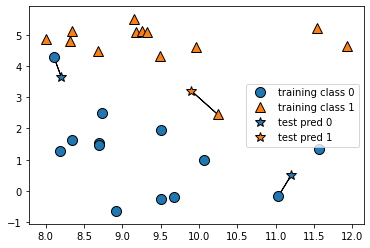

In [4]:
# make_forge로 생성된 데이터에 knn 적용한 결과 시각화
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


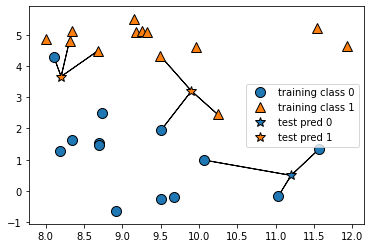

In [50]:
# make_forge로 생성된 데이터에 knn 적용한 결과 시각화
mglearn.plots.plot_knn_classification(n_neighbors=3) # 범위 넓히기

In [59]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


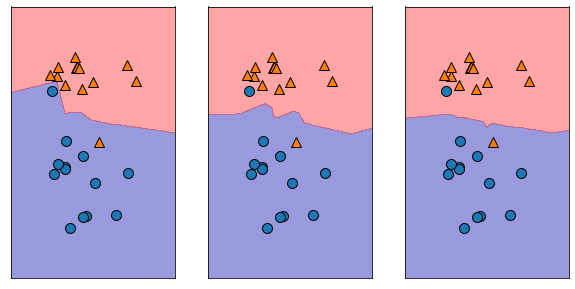

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5)) # subplots : 여러 개의 plot을 초기화 / 1행 3열 그리겠다(3개)
for n,ax in zip([1, 3, 9], axes):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
#     print(knn.score(X_train, y_train), ' / ', knn.score(X_test, y_test)) # 결과 확인
    print(ax)
    mglearn.plots.plot_2d_separator(knn, X, ax=ax, fill=True, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

plt.show()

In [96]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [125]:
len(y), y.sum(), len(y) - y.sum() # y는 악성인지 약성인지 나타낸 것 # sum은 1만(양성) 뽑은 것 # 데이터 불균형 상태(훈련데이터와 테스트 비율이 한 쪽이 과다하게 많다거나, 8:2가 아니라거나..)-> stratify

(569, 357, 212)

In [126]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) # stratify : 원본 데이터의 비율을 유지하겠다(y에 있는 훈련데이터와 테스트데이터 비율 유지해줘라)

In [127]:
train_accuracy = []
test_accuracy = []
for n in range(1, 11): # 1~10 
    knn = KNeighborsClassifier(n_neighbors=n) # n=5일 때 최적(0.93, 0.96) # 0.07은 꽤나 큰 차이 
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test)) 

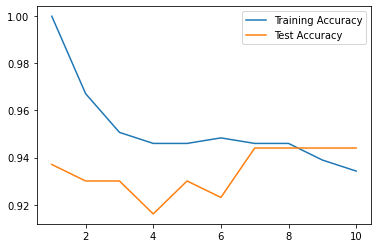

In [128]:
plt.plot(range(1,11), train_accuracy, label='Training Accuracy')
plt.plot(range(1,11), test_accuracy, label='Test Accuracy')
plt.legend()
plt.show() # 모델이 망가진 것 , 훈련 데이터보다 테스트 데이터가 올라가는 게 쉽지 않음!! -> 문제가 있을 가능성이 높다. # 7~8이 최종 모델, 그 이후는 과소적합(불필요한 모델)

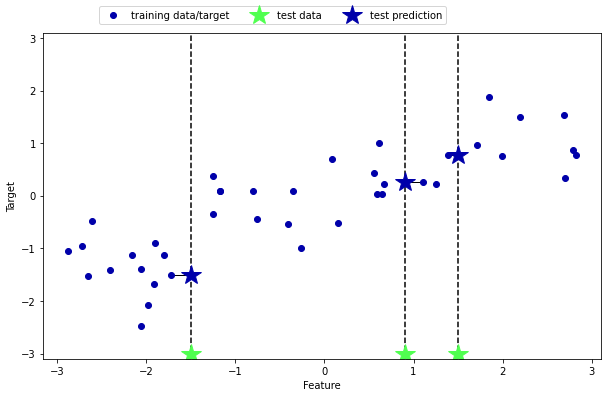

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

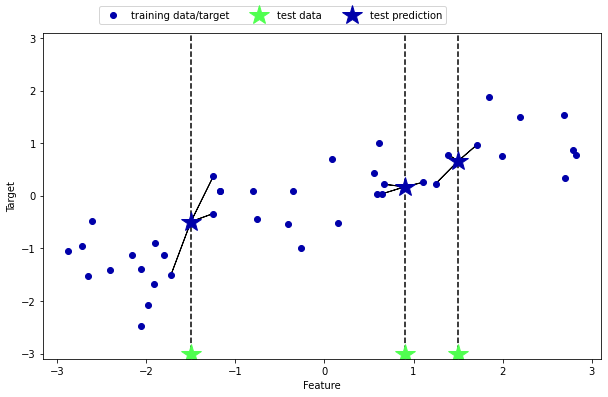

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
X, y= mglearn.datasets.make_wave(n_samples=40) # 40개의 데이터 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knnr= KNeighborsRegressor(n_neighbors=1)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [22]:
predicted_y = knnr.predict(X_test)
#predicted_y[:5]
print(knnr.score(X_train, y_train))
print(knnr.score(X_test, y_test))
      

1.0
-0.09261995686937108


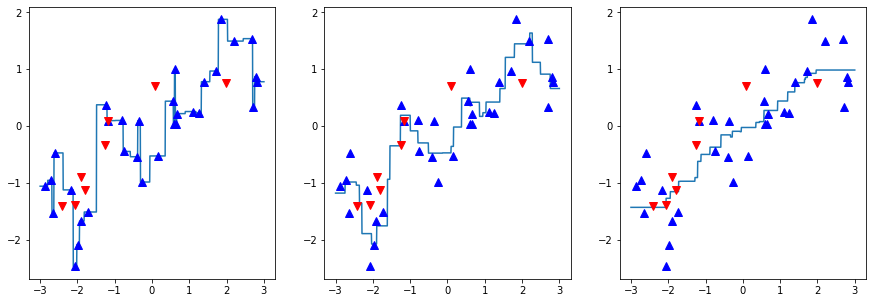

In [23]:
fig, axes= plt.subplots(1,3,figsize=(15,5)) # 1행 3열의 subplot만들기
line = np.linspace(-3,3,1000)
line = line.reshape(-1, 1) # 1d array -> 2d array로 바꿈. 이 때 열은 1 
for n, ax in zip([1,3,9], axes): # zip([1,2,3],[5,6,7])이면 [1,5],[2,6],[3,7]로 꺼내는 것 # axes는 subplot그림 전체를 말함 (ax는 각 subplot) -> [1,ax1(이웃이 1개일 때 그래프)],[3,ax2(이웃이 3개)],[9,ax3]로 나옴
    knnr = KNeighborsRegressor(n_neighbors=n)
    knnr.fit(X_train, y_train)
    ax.plot(line, knnr.predict(line))
    ax.plot(X_train, y_train, "^",c='blue', markersize=8) # ^ = 삼각형 모양, c(color)
    ax.plot(X_test, y_test, "v",c='red', markersize=8) # 이웃의 개수가 9일 때 오차가 줄어드는 것을 알 수 있다. 선이 지나치게 완만하면 과소적합이다. # 오차 가장 작은 선!-> 일반화 성능이 높다(예측하는 데 좋은 모형일 것이다)
    
plt.show() # 이웃이 1개일 때 가장 트레인 데이터를 잘 쫓으나, 선이 삐뚤삐뚤함 -> 과대적합. 완만한 선(n=9)일 경우 일반화하기 좋다

In [5]:
line = np.linspace(-3,3,12) # -3~3까지의 수 12개
#line
line.reshape(-1,3) # 데이터 12개 중에서 -1은 데이터에 맞추어 자동으로 하라! 열은 3개이고 행은 거기에 맞춰서 
line.reshape(4,-1) # 위와 같은 행 열

array([[-3.        , -2.45454545, -1.90909091],
       [-1.36363636, -0.81818182, -0.27272727],
       [ 0.27272727,  0.81818182,  1.36363636],
       [ 1.90909091,  2.45454545,  3.        ]])

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()
# print(boston['data'].shape, boston['target'].shape)
# print(boston['data'][:2])
X, y = boston['data'], boston['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
knnr = KNeighborsRegressor(n_neighbors=3) # 3~4가 최적
knnr.fit(X_train, y_train)

print(knnr.score(X_train, y_train),'/',knnr.score(X_test, y_test))

0.7524897290455947 / 0.6946008632462907


In [9]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler() # 데이터를 속성(분포)에 맞게 0과 1사이 값으로 매핑 
mms.fit(X_train)

MinMaxScaler()

In [10]:
X_train_transformed = mms.transform(X_train)
X_train_transformed[:, 0].min(), X_train_transformed[:, 0].max() # 모두 최대 최소가 1,0으로 됨
# X_test_transformed = mms.transform(X_test)

X_test_transformed = mms.transform(X_test)
X_test_transformed[:,2].min(), X_test_transformed[:, 3].max() # 훈련 데이터에 맞는 스케일러라 0과 1이 안나올 수가 있음 , minmaxscaler 한 번만 써야하고 트레인 데이터에 맞춰진 것만 써야 하지 테스트에 맞춘 것을 쓰면 안된다.
# train 데이터는 가능하나, test 데이터는 0과 1 사이값이 무조건 되지는 않음 -> 그렇다고 스케일러를 새로 다시 만들면 안됨 -> 조작을 하게 되는 경우 올바른 모형이 나오지않음(테스트에 맞는 모형) 
#테스트 할 때 변화 주면 안됨. 트레인에 쓴 거 그대로

(-0.028269883151149644, 1.0)

In [11]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X_train_transformed, y_train)
knnr.score(X_train_transformed, y_train), knnr.score(X_test_transformed, y_test) # X_test, y_test보다 더 좋아짐

(0.890446563451937, 0.7309605924331992)

In [27]:
# data-files/diabetes.csv 파일의 데이터를 사용해서
# KNN 알고리즘 분류기를 만들고 훈련
# 훈련 데이터와 테스트 데이터의 에측 성능 평가

data = pd.read_csv('data-files/diabetes.csv')
data = pd.DataFrame(data) # 데이터프레임 -> array로 해야 분석 가능
# data
array = np.array(data)

In [37]:
# data['Outcome'] : y 나머지 : x로하겠다
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [60]:
X,y = data.iloc[:,:-1], data['Outcome'] # y는 Outcome이고 x는 그 나머지 다 넣어야 함
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [61]:
knnr= KNeighborsRegressor(n_neighbors=1)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [63]:
print(knnr.score(X_train, y_train),'/', knnr.score(X_test, y_test))

1.0 / -0.44786143513609056


In [65]:
from sklearn.preprocessing import MinMaxScaler

mms= MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [1]:
# 선생님
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
diabetes = pd.read_csv('data-files/diabetes.csv', encoding='utf-8')

In [5]:
diabetes.info() # 형변환 안해두댐. 다 자료형 숫자형, dataframe임
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X, y = diabetes.drop('Outcome',axis=1).values, diabetes['Outcome'].values # outcome 제외 나머지, 열방향 / outcome만

In [13]:
np.unique(y, return_counts=True) # 당뇨가 아닌 것이 500, 당뇨인 것이 268 -> 분포가 다름. 밑에서 stratify 사용 -> 비슷하더라두 하는게 낫당

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=121111)                                                                                                                                    

In [15]:
np.unique(y_train, return_counts = True) # 얼추 비슷해짐

(array([0, 1], dtype=int64), array([375, 201], dtype=int64))

In [16]:
mms = MinMaxScaler()
mms.fit(X_train) # X_train 데이터를 사용해서 min, max 학습

MinMaxScaler()

In [19]:
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [22]:
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
print(knnc.score(X_train_scaled, y_train)) # 이걸루 결과 나온당
print(knnc.score(X_test_scaled, y_test))

0.8541666666666666
0.734375
